<a href="https://colab.research.google.com/github/Gayathri-achari/DL-COLAB/blob/Matrices/pattern_recognitoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from keras.utils import to_categorical
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0386 - val_accuracy: 0.9904
Epoch 2/150
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0399 - val_accuracy: 0.9913
Epoch 3/150
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0542 - val_accuracy: 0.9876
Epoch 4/150
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0466 - val_accuracy: 0.9900
Epoch 5/150
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0405 - val_accuracy: 0.9903
Epoch 6/150
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0453 - val_accuracy: 0.9898
Epoch 7/150
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0

In [10]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predict the values from the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 5s 15ms/step


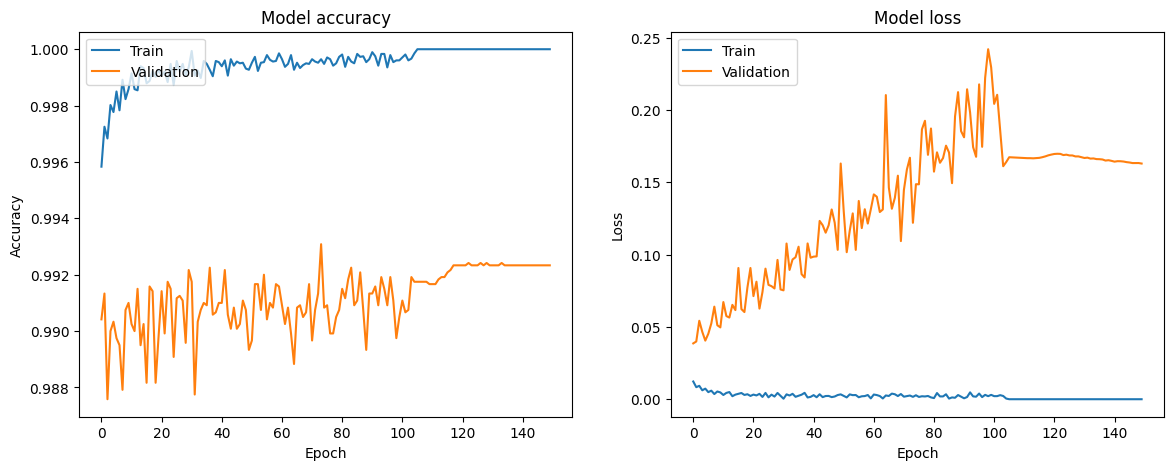

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()